Equality tables using Gini (statistical variability metric) - 0% is perfect equality, 100% is maximal inequality

In [2]:
import numpy as np
from datascience import *
import re
import datetime
import geopy
import time
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

We're going to use World Bank and CIA GINI indices and get the average. First, let's clean our world_bank data

In [3]:
world_bank = Table.read_table('world_bank_gini_index.csv')

world_bank_cleaned = world_bank.drop('Country Code', 'Indicator Name', 'Indicator Code')
world_bank_cleaned = world_bank_cleaned.relabel('Country Name', 'Country')
world_bank_cleaned

Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Aruba,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Afghanistan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Angola,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,52,nan,nan,nan,nan,nan,nan,nan,42.7,nan,nan,nan,nan,nan,nan,nan,nan,nan,51.3,nan
Albania,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,27,nan,nan,nan,nan,nan,31.7,nan,nan,30.6,nan,nan,30,nan,nan,nan,29,nan,34.6,32.9,33.7,33.2,nan,nan
Andorra,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Arab World,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
United Arab Emirates,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,32.5,nan,nan,nan,nan,nan
Argentina,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,40.8,nan,nan,nan,nan,nan,42.8,45.3,nan,nan,nan,46.8,45.5,44.9,45.9,48.9,49.5,49.1,50.7,49.8,51.1,53.3,53.8,51.2,48.6,48,46.7,46.6,45.3,44.1,44.5,42.7,41.4,41,41.7,nan,42,41.2,41.4,nan
Armenia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,36.2,nan,35.4,34.8,33,37.5,36,29.7,31.2,29.2,28,30,29.4,29.6,30.6,31.5,32.4,32.5,33.6,34.4,nan
American Samoa,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [4]:
countries = world_bank_cleaned.select('Country')
world_bank_flattened = Table().with_columns('Country', [], 'Year', [], 'Index', [])

for column in world_bank_cleaned:
    selected = world_bank_cleaned.select(column)
    if selected.labels[0] == 'Country':
        continue
    
    countries = Table().with_columns(countries)
    years = countries.with_columns("Year", [selected.labels[0]] * (world_bank_cleaned.num_rows))
    index = years.with_columns('Index', selected.column(0))
    
    test = world_bank_flattened.append(index)

world_bank_flattened

Country,Year,Index
Aruba,1960,nan
Afghanistan,1960,nan
Angola,1960,nan
Albania,1960,nan
Andorra,1960,nan
Arab World,1960,nan
United Arab Emirates,1960,nan
Argentina,1960,nan
Armenia,1960,nan
American Samoa,1960,nan


In [5]:
world_bank_no_nan = world_bank_flattened.where('Index', are.above_or_equal_to(0))
world_bank_no_nan

Country,Year,Index
Sweden,1967,34
United Kingdom,1969,33.7
Canada,1971,37.3
United Kingdom,1974,30
United States,1974,35.3
Canada,1975,33.3
Sweden,1975,24.3
France,1978,35.2
United Kingdom,1979,28.4
Israel,1979,36.3


In [6]:
world_bank_recent = world_bank_no_nan.group(['Country'], max)
world_bank_recent = world_bank_recent.drop('Index max').relabel('Year max', 'Year')
world_bank_recent = world_bank_recent.join('Year', world_bank_no_nan)
world_bank_recent = world_bank_recent.where('Country', are.equal_to, 'Country_2')
world_bank_recent = world_bank_recent.drop('Country_2')

world_bank_recent

Year,Country,Index
1992,Trinidad and Tobago,40.3
1998,Guyana,44.6
1998,Turkmenistan,40.8
1999,Belize,53.3
1999,Suriname,57.6
2003,Uzbekistan,35.3
2004,Jamaica,45.5
2004,Syrian Arab Republic,35.8
2005,Azerbaijan,26.6
2006,Kiribati,37


Now let's merge this with our prison rate data.

In [7]:
wpb = Table.read_table('wpb_prison_rate.csv')

wpb

Year,Country,"Prisoners Per 100,000"
2018,Afghanistan,88
2018,Albania,193
2018,Algeria,146
2018,American Samoa,337
2018,Andorra,69
2018,Angola,93
2018,Anguilla,307
2018,Antigua and Barbuda,321
2018,Argentina,186
2018,Armenia,131


In [8]:
countries = world_bank_recent.join('Country', wpb)
countries = countries.relabel('Year', 'Index Year').relabel('Year_2', 'Prisoners Year')
countries

Country,Index Year,Index,Prisoners Year,"Prisoners Per 100,000"
Albania,2017,33.2,2018,193
Algeria,2011,27.6,2018,146
Angola,2018,51.3,2018,93
Argentina,2018,41.4,2018,186
Armenia,2018,34.4,2018,131
Australia,2014,34.4,2018,167
Austria,2017,29.7,2018,98
Azerbaijan,2005,26.6,2018,235
Bangladesh,2016,32.4,2018,53
Belarus,2018,25.2,2018,364


In [9]:
countries_without_year = countries.drop('Index Year', 'Prisoners Year')
countries_without_year

Country,Index,"Prisoners Per 100,000"
Albania,33.2,193
Algeria,27.6,146
Angola,51.3,93
Argentina,41.4,186
Armenia,34.4,131
Australia,34.4,167
Austria,29.7,98
Azerbaijan,26.6,235
Bangladesh,32.4,53
Belarus,25.2,364


In [13]:
countries_by_continent = Table.read_table('countries_by_continent.csv')

countries_with_continent = countries_without_year.join('Country', countries_by_continent)
countries_with_continent

Country,Index,"Prisoners Per 100,000",Continent
Albania,33.2,193,Europe
Algeria,27.6,146,Africa
Angola,51.3,93,Africa
Argentina,41.4,186,South America
Armenia,34.4,131,Europe
Australia,34.4,167,Oceania
Austria,29.7,98,Europe
Azerbaijan,26.6,235,Europe
Bangladesh,32.4,53,Asia
Belarus,25.2,364,Europe


First let's identify if there's any correlation between index and prisoners per 100k pop.

In [22]:
def correlation_from_table(table, col_x, col_y):
    data_x = table.column(col_x)
    data_y = table.column(col_y)
    standard_units_x = (data_x - np.mean(data_x)) / np.std(data_x)
    standard_units_y = (data_y - np.mean(data_y)) / np.std(data_y)
    correlation = np.mean(standard_units_x * standard_units_y)
    return correlation

In [23]:
correlation_from_table(countries_with_continent, 'Index', 'Prisoners Per 100,000')

0.1924697213232425

It turns out that the correlation coefficient is super low. This becomes apparent when looking at a scatter plot of this data.

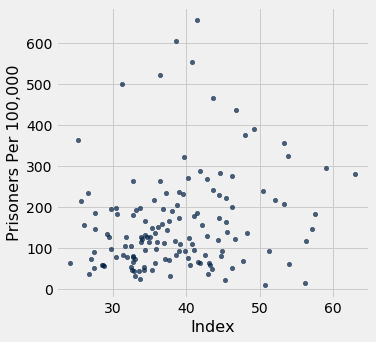

In [24]:
# continent = countries_with_continent.where('Continent', are.contained_in(['Asia']))

countries_with_continent.scatter('Index', 'Prisoners Per 100,000')

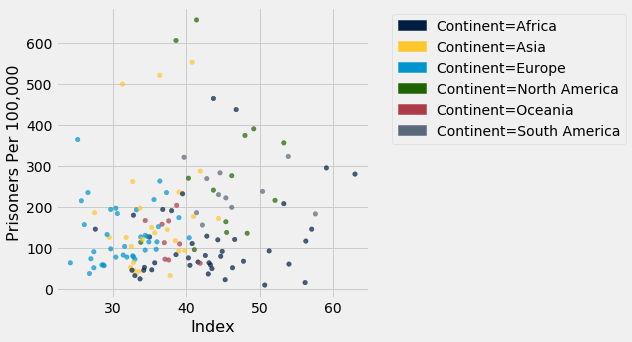

In [25]:
countries_with_continent.scatter('Index', 'Prisoners Per 100,000', group='Continent')

There seems to be some clustering by continent. We can see what the average and median values are per continent and how distributed they are.

In [36]:
averages = countries_with_continent.group('Continent', np.average)
median = countries_with_continent.group('Continent', np.median)

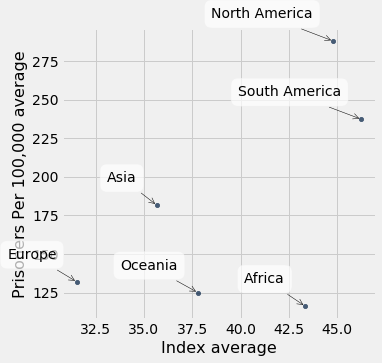

In [31]:
averages.scatter('Index average', 'Prisoners Per 100,000 average', labels='Continent')

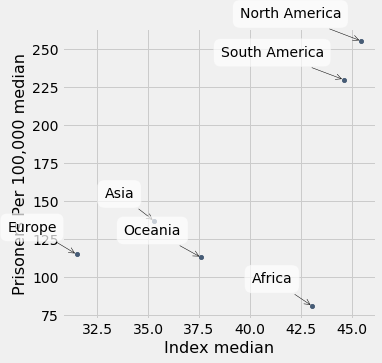

In [35]:
median.scatter('Index median', 'Prisoners Per 100,000 median', labels='Continent')